In [5]:
# 데이터
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import load_boston
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [16]:
data.shape

(506, 13)

In [17]:
df = pd.DataFrame(np.hstack([data,target.reshape(-1,1)]))
ss = StandardScaler()
df.values[:,:-1] = ss.fit_transform(df.values[:,:-1]).round(4)

In [18]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.4198,0.2848,-1.2879,-0.2726,-0.1442,0.4137,-0.1200,0.1402,-0.9828,-0.6666,-1.4590,0.4411,-1.0756,24.0
1,-0.4173,-0.4877,-0.5934,-0.2726,-0.7403,0.1943,0.3672,0.5572,-0.8679,-0.9873,-0.3031,0.4411,-0.4924,21.6
2,-0.4173,-0.4877,-0.5934,-0.2726,-0.7403,1.2827,-0.2658,0.5572,-0.8679,-0.9873,-0.3031,0.3964,-1.2087,34.7
3,-0.4168,-0.4877,-1.3069,-0.2726,-0.8353,1.0163,-0.8099,1.0777,-0.7529,-1.1061,0.1130,0.4162,-1.3615,33.4
4,-0.4125,-0.4877,-1.3069,-0.2726,-0.8353,1.2286,-0.5112,1.0777,-0.7529,-1.1061,0.1130,0.4411,-1.0265,36.2


In [19]:
# 정규화하는 방법 두가지
# 1. 최대최소
# 2. 표준 - 정규분포형태
# 3. 로버스트 : 이상치에 영향을 받지 않음

In [69]:
# 학습코드
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [70]:
# dataframe - torch tensor
data = torch.from_numpy(df.values).float()
x = data[:,:-1]
y = data[:,-1:]

In [71]:
class MyModel(nn.Module):
  def __init__(self,input_dim,output_dim):
    super(MyModel,self).__init__()
    self.input_dim = input_dim
    self.output_dim = output_dim

    self.lin1 = nn.Linear(input_dim,3)
    self.lin2 = nn.Linear(3,6)
    self.lin3 = nn.Linear(6,3)
    self.lin4 = nn.Linear(3,output_dim)
    self.act = nn.ReLU()    
  def forward(self, x):    
    x = self.act(self.lin1(x))
    x = self.act(self.lin2(x))
    x = self.act(self.lin3(x))
    x = self.lin4(x)
    return x

model = MyModel(x.size(-1), y.size(-1))
model




MyModel(
  (lin1): Linear(in_features=13, out_features=3, bias=True)
  (lin2): Linear(in_features=3, out_features=6, bias=True)
  (lin3): Linear(in_features=6, out_features=3, bias=True)
  (lin4): Linear(in_features=3, out_features=1, bias=True)
  (act): ReLU()
)

In [75]:
opti = optim.SGD(model.parameters(), lr = 1e-4)
for i in range(100000):
  y_hat = model(x)
  loss = F.mse_loss(y_hat, y)
  opti.zero_grad()
  loss.backward()
  opti.step()
  if i % 1000 == 0:
    print(f"epoch:{i} loss:{loss}")

epoch:0 loss:6.455502510070801
epoch:1000 loss:6.446536064147949
epoch:2000 loss:6.437592506408691
epoch:3000 loss:6.4268798828125
epoch:4000 loss:6.419751167297363
epoch:5000 loss:6.405096054077148
epoch:6000 loss:6.397116661071777
epoch:7000 loss:6.390933990478516
epoch:8000 loss:6.3839850425720215
epoch:9000 loss:6.37772798538208
epoch:10000 loss:6.373002052307129
epoch:11000 loss:6.3034868240356445
epoch:12000 loss:6.276837348937988
epoch:13000 loss:6.263635158538818
epoch:14000 loss:6.253032207489014
epoch:15000 loss:6.2441582679748535
epoch:16000 loss:6.23553991317749
epoch:17000 loss:6.228837013244629
epoch:18000 loss:6.223124980926514
epoch:19000 loss:6.216575622558594
epoch:20000 loss:6.211841583251953
epoch:21000 loss:6.2065958976745605
epoch:22000 loss:6.199439525604248
epoch:23000 loss:6.196187973022461
epoch:24000 loss:6.193183422088623
epoch:25000 loss:6.19038200378418
epoch:26000 loss:6.188081741333008
epoch:27000 loss:6.185999393463135
epoch:28000 loss:6.184067726135254

In [76]:
import seaborn as sns
torch.cat([y_hat,y],dim=1)
predic_df = pd.DataFrame(torch.cat([y_hat,y],dim=1).detach().numpy(),columns=['y_hat','y'])

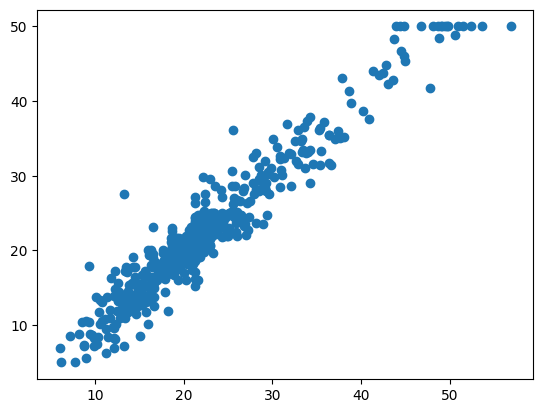

In [82]:
predic_df['y_hat'].values
predic_df['y'].values
plt.scatter(predic_df['y_hat'].values,predic_df['y'].values)

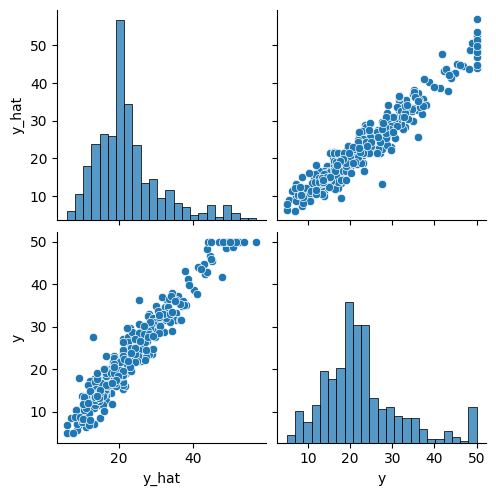

In [78]:
sns.pairplot(predic_df)